#   HEART DISEASE PREDICTION MODEL.


In [1]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


### IMPORTING DATASET 

In [2]:
heart = pd.read_csv("heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Describing the dataset 

In [3]:
heart.info()
print("==" *40)
len(heart)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1025

In [4]:
heart.describe()
# print(heart["chol"].max())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Now we have to preprocess the data 


### And the first step is to change the missing values into their means

In [5]:
# we have unknown values '?'
# change unrecognized value '?' into mean value through the column
for c in heart.columns[:]:
    heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
    heart[c] = heart[c].astype(float)

In [6]:
heart[-10:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58.0,1.0,0.0,128.0,216.0,0.0,0.0,131.0,1.0,2.2,1.0,3.0,3.0,0.0
1016,65.0,1.0,3.0,138.0,282.0,1.0,0.0,174.0,0.0,1.4,1.0,1.0,2.0,0.0
1017,53.0,1.0,0.0,123.0,282.0,0.0,1.0,95.0,1.0,2.0,1.0,2.0,3.0,0.0
1018,41.0,1.0,0.0,110.0,172.0,0.0,0.0,158.0,0.0,0.0,2.0,0.0,3.0,0.0
1019,47.0,1.0,0.0,112.0,204.0,0.0,1.0,143.0,0.0,0.1,2.0,0.0,2.0,1.0
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0
1024,54.0,1.0,0.0,120.0,188.0,0.0,1.0,113.0,0.0,1.4,1.0,1.0,3.0,0.0


##  Next step is on understanding the data.
###  We use Correalation Matrix here understand the degree of association between the features.

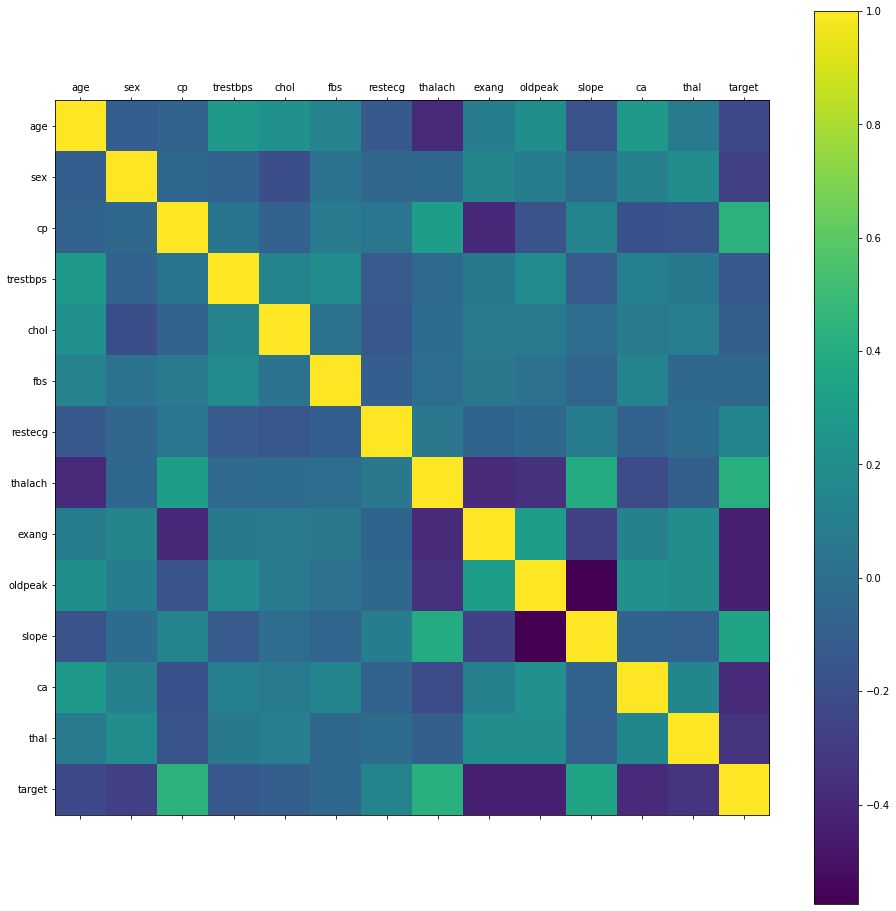

In [7]:
rcParams['figure.figsize'] = 20, 20
plt.matshow(heart.corr())
plt.yticks(np.arange(heart.shape[1]), heart.columns)
plt.xticks(np.arange(heart.shape[1]), heart.columns)
plt.colorbar()

## We find no feature that has a significant correalation with the target value
###  Some features even have negative correlation with the target value, but few features have lower positive correlation

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

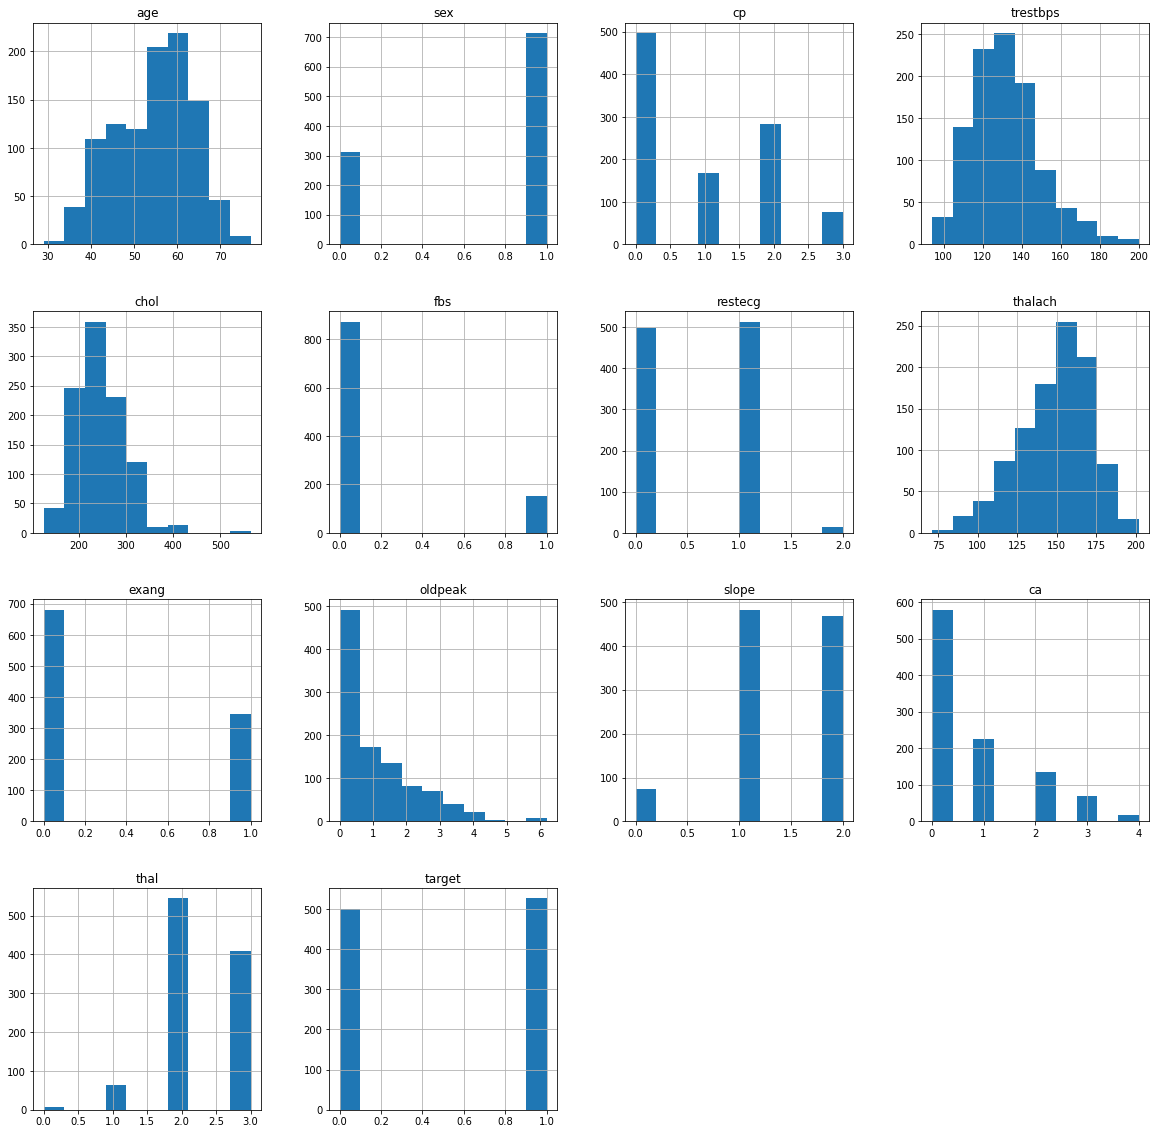

In [8]:
heart.hist()

Text(0.5, 1.0, 'Count of each target')

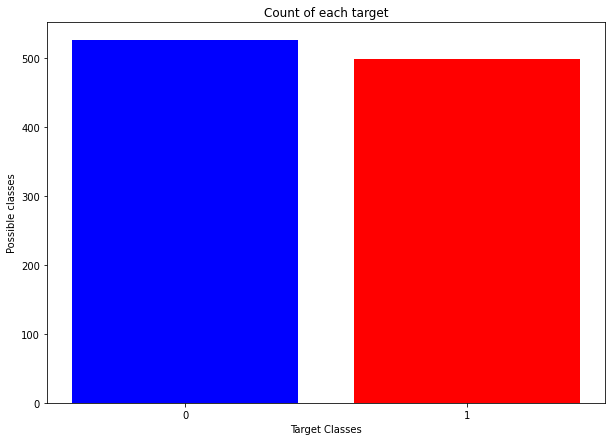

In [9]:
        rcParams['figure.figsize'] = 10, 7
        plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['blue', 'red'])
        plt.xticks([0,1])
        plt.xlabel('Target Classes')
        plt.ylabel('Possible classes')
        plt.title('Count of each target')

# Feature scaling.............................................
some features may have a greater influence over others in the outcome since distances are used

In [10]:
# heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
min_max = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[columns_to_scale ] = min_max.fit_transform(heart[columns_to_scale ])

## Thus we have normalized the dataset accordingly but placing the values in range for proper evaluation using the MinMaxScaler/ StandardScaler ????

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.942439,0.354827,0.273973,0.149268,0.529756,0.596291,0.336585,0.172825,1.385366,0.754146,2.323902,0.513171
std,0.189006,0.460373,1.029641,0.165252,0.117791,0.356527,0.527878,0.175616,0.472772,0.189525,0.617755,1.030798,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.465649,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,0.562500,1.000000,1.000000,0.339623,0.260274,0.000000,1.000000,0.618321,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,0.666667,1.000000,2.000000,0.433962,0.340183,0.000000,1.000000,0.725191,1.000000,0.290323,2.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


# THE DATA SET IS NOW READY..


# WE CAN BEGIN WITH OUR TRAINING MODELS






## In this model, we took took 4 algorithms and varied their various parameters and compared the final models. 
##  dataset  is spit into 67% training data and 33% testing data.

In [12]:
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

print(len(X_train))
len(X_test)


686


339

## Algorithm 1: K Neighbours Classifier
This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point. However, the number of neighbors can be varied.Neighbours can be varied them from 1 to 20 neighbors and calculated the test score in each case.

In [13]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
knn_scores

[1.0,
 0.9734513274336283,
 0.9587020648967551,
 0.9144542772861357,
 0.8997050147492626,
 0.9056047197640118,
 0.887905604719764,
 0.8820058997050148,
 0.8967551622418879,
 0.8967551622418879,
 0.9056047197640118,
 0.8908554572271387,
 0.887905604719764,
 0.8938053097345132,
 0.8938053097345132,
 0.8849557522123894,
 0.8702064896755162,
 0.8613569321533924,
 0.8643067846607669,
 0.8613569321533924]

### Training and Testing phase Completed.
### Next Plotting


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

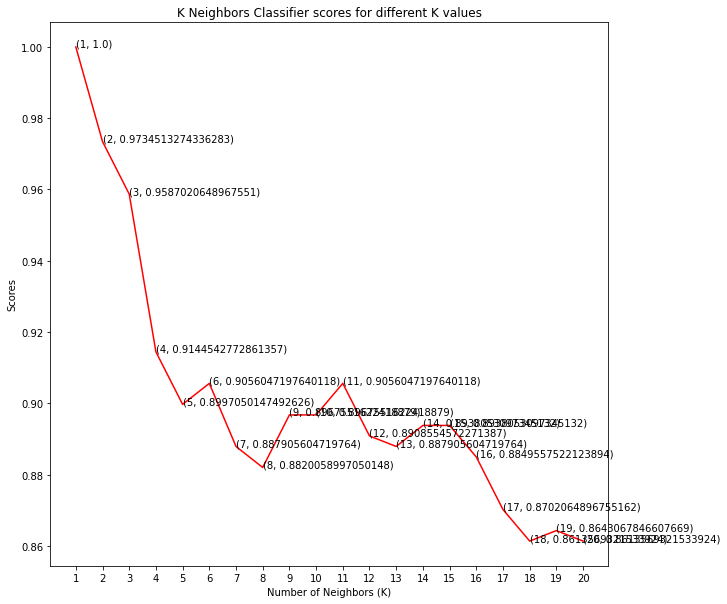

In [14]:
rcParams['figure.figsize'] = 10,10
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

### As you can see, we achieved the maximum score of 87% when the number of neighbors was chosen to be 3.


## Algorithm 2: Support Vector Classifier

This classifier aims at forming a hyperplane that can separate the classes as much as possible by adjusting the distance between the data points and the hyperplane. There are several kernels based on which the hyperplane is decided.
We have based our attention on linear, poly, sigmoid and rbf

In [15]:
svc_scores = []
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

### Training and Testing phase Completed.
### Next Plotting

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

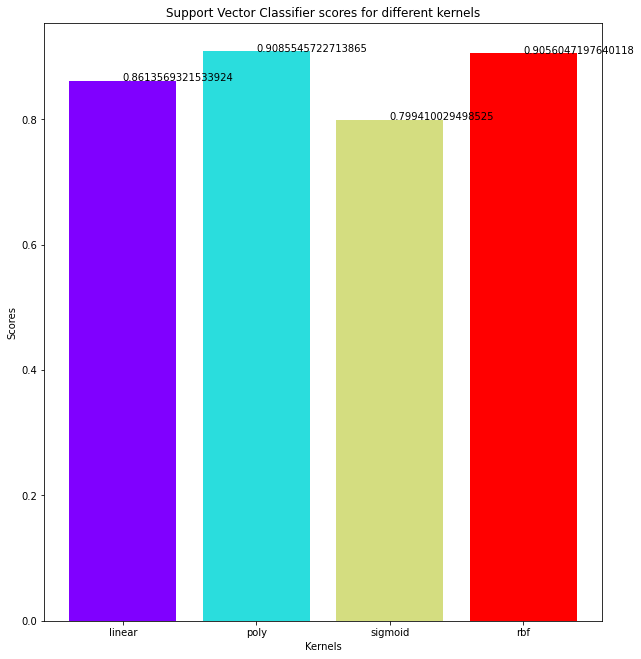

In [16]:
rcParams['figure.figsize'] = 10,11
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

## Algorithm 3:  Decision Tree Classifier


This classifier creates a decision tree based on which, it assigns the class values to each data point. Here, we can vary the maximum number of features to be considered while creating the model. I range features from 1 to 30 (the total features in the dataset after dummy columns were added).

In [17]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

### Training and Testing phase Completed.
### Next Plotting


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

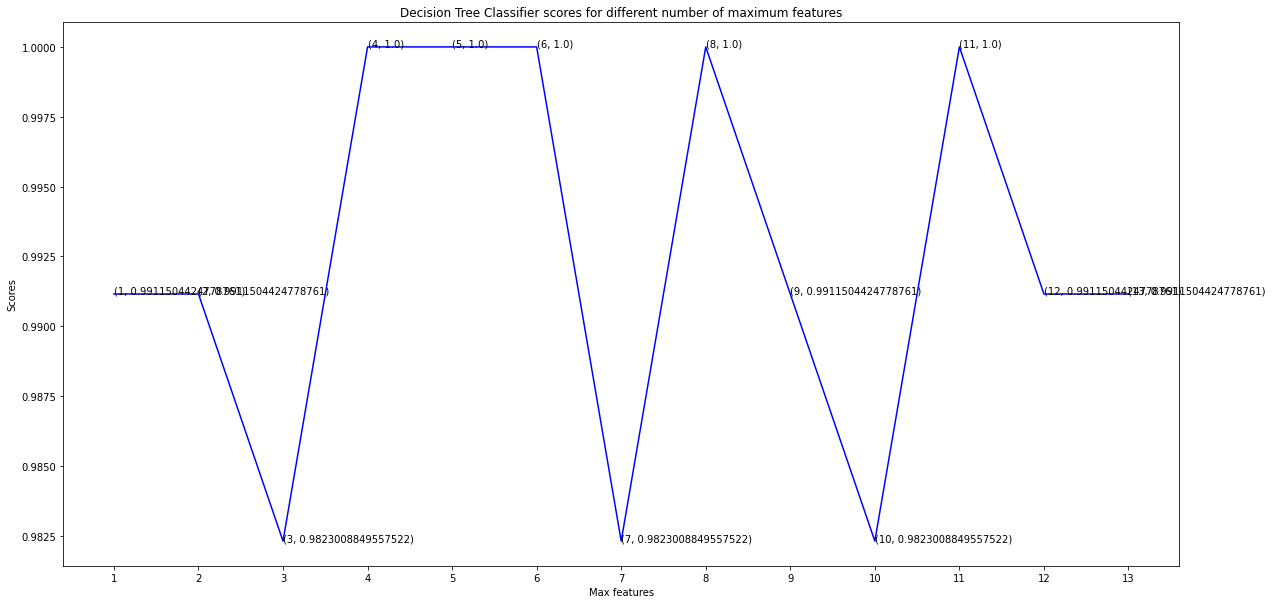

In [18]:
rcParams['figure.figsize'] = 20,10

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [19]:
# insert value of the columns in this array here and then run
X_predict1 = np.array([[0.729167,1.0,3.0,0.716981,0.230594,0.0,0.0,0.641221,0.0,0.096774,1.0,0.0,3.0
]])
X_predict2 = np.array([[0.854167,1.0,0.0,0.481132,0.109589,0.0,1.0,0.412214 ,1.0,0.419355,0.0,0.0, 3
]])
X_predict = X_predict1.reshape(1, -1)
#uncomment this individually and run
#knn_classifier.predict(X_predict1)
#knn_classifier.predict(X_predict2)
knn_classifier.predict(X_test)

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0.

In [20]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
807,0.312500,1.0,2.0,0.339623,0.244292,0.0,1.0,0.824427,1.0,0.064516,2.0,0.0,2.0
27,0.604167,0.0,1.0,0.396226,0.440639,1.0,0.0,0.618321,0.0,0.000000,2.0,2.0,2.0
77,0.708333,1.0,0.0,0.433962,0.139269,0.0,0.0,0.557252,1.0,0.645161,2.0,2.0,3.0
406,0.604167,1.0,2.0,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,2.0,0.0,2.0
886,0.666667,1.0,0.0,0.245283,0.305936,0.0,1.0,0.526718,1.0,0.580645,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.791667,1.0,0.0,0.245283,0.253425,0.0,1.0,0.000000,0.0,0.161290,1.0,0.0,2.0
116,0.708333,1.0,0.0,0.339623,0.292237,0.0,0.0,0.580153,0.0,0.225806,1.0,1.0,3.0
293,0.625000,1.0,2.0,0.528302,0.196347,1.0,1.0,0.656489,0.0,0.258065,2.0,0.0,2.0
76,0.395833,1.0,2.0,0.283019,0.294521,1.0,1.0,0.793893,0.0,0.000000,2.0,2.0,2.0


In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
score = linear_reg.score(X_test, y_test)
score

0.5551043091382573

In [22]:
rf_scores = []
estimators = [10, 100, 200,210, 220, 230, 240, 250, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

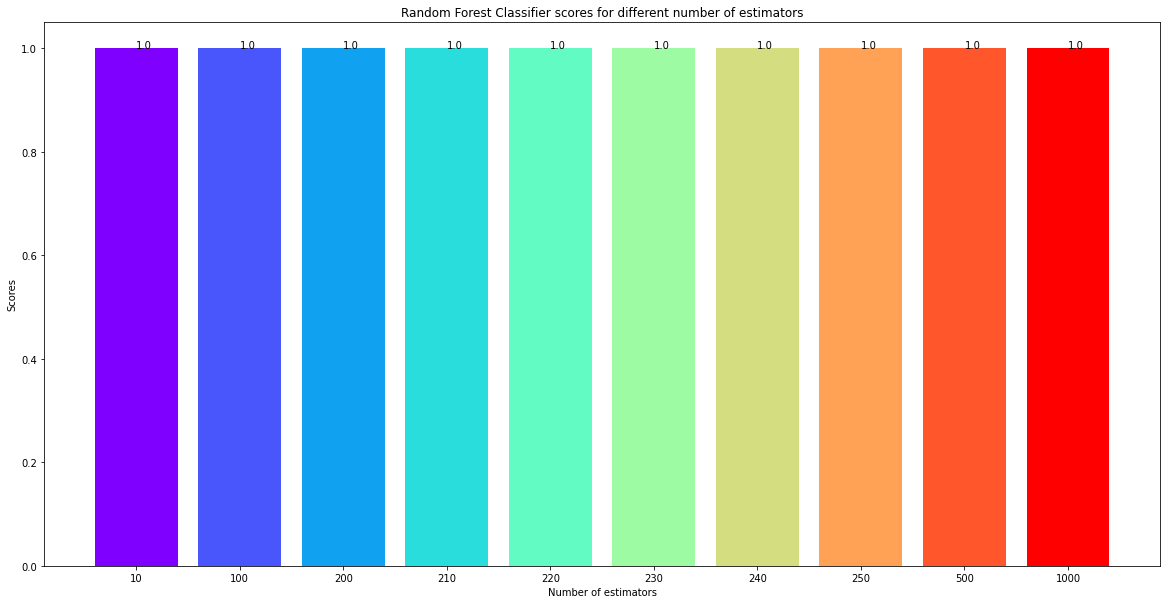

In [23]:

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [24]:
BerNB = BernoulliNB(binarize = 0.1)
BerNB.fit(X_train, y_train)
BerNB.score(X_test, y_test)
# BerNB.predict(X_test)

0.8584070796460177

In [25]:
MulNB = MultinomialNB()
MulNB.fit(X_train, y_train)
BerNB.score(X_test, y_test)

0.8584070796460177